In [71]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [72]:
pd.set_option('display.max_columns', None)

In [206]:
df = pd.read_csv("Copper_Set.csv", low_memory= False)

In [207]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [209]:
df.duplicated().sum()

np.int64(0)

In [210]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')

In [211]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce').round(2)

In [212]:
df['quantity tons']

0           54.15
1          768.02
2          386.13
3          202.41
4          785.53
           ...   
181668     102.48
181669     208.09
181670       4.24
181671   -2000.00
181672     406.69
Name: quantity tons, Length: 181673, dtype: float64

In [213]:
df['quantity tons'].dtype

dtype('float64')

In [214]:
df['product_ref'].value_counts()

product_ref
611993        45727
164141591     28785
640665        27375
1670798778    18916
628377        18574
1668701718    15284
640405         9715
1671863738     5162
1332077137     4561
1693867550     1825
1668701376     1216
1671876026      823
628117          775
164337175       653
1668701698      374
1693867563      293
1282007633      281
1721130331      257
1665572374      202
628112          177
611728          148
1690738206      147
1722207579      125
640400           83
1668701725       56
164336407        49
611733           45
1690738219       19
1665584320       12
1665572032       10
1665584642        2
929423819         1
1665584662        1
Name: count, dtype: int64

In [215]:
df['customer'].value_counts()

customer
30157111.0    4988
30161088.0    3733
30201846.0    3152
30165529.0    2728
30202938.0    2570
              ... 
30349545.0       1
30202512.0       1
30356502.0       1
30356522.0       1
30332407.0       1
Name: count, Length: 1169, dtype: int64

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181671 non-null  object        
 1   item_date      181670 non-null  datetime64[ns]
 2   quantity tons  181672 non-null  float64       
 3   customer       181672 non-null  float64       
 4   country        181645 non-null  float64       
 5   status         181671 non-null  object        
 6   item type      181673 non-null  object        
 7   application    181649 non-null  float64       
 8   thickness      181672 non-null  float64       
 9   width          181673 non-null  float64       
 10  material_ref   103754 non-null  object        
 11  product_ref    181673 non-null  int64         
 12  delivery date  181670 non-null  datetime64[ns]
 13  selling_price  181672 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(4

In [217]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.02,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0


In [218]:
# Unique Identifier. Hence can be removed
df['id'].nunique()

181671

In [219]:
# Feature Engineering
df['delivery_time_taken']=(df['item_date']-df['delivery date']).abs().dt.days

In [220]:
# For item_date
df['item_year'] = df['item_date'].dt.year
df['item_month'] = df['item_date'].dt.month
df['item_day'] = df['item_date'].dt.day
df['item_dayofweek'] = df['item_date'].dt.dayofweek

# For delivery_date
df['delivery_year'] = df['delivery date'].dt.year
df['delivery_month'] = df['delivery date'].dt.month
df['delivery_day'] = df['delivery date'].dt.day
df['delivery_dayofweek'] = df['delivery date'].dt.dayofweek

In [221]:
# Frequency encoding
customer_frequency = df['customer'].value_counts()
df['customer_frequency'] = df['customer'].map(customer_frequency)

In [222]:
# Frequency encoding
product_ref_frequency = df['product_ref'].value_counts()
df['product_ref_frequency'] = df['product_ref'].map(product_ref_frequency)

In [223]:
customer_frequency_st = df['customer'].value_counts().to_dict()
product_ref_frequency_st = df['product_ref'].value_counts().to_dict()

In [231]:
customer_frequency_st[30161656]

442

In [228]:
print(product_ref_frequency_st)

{611993: 45727, 164141591: 28785, 640665: 27375, 1670798778: 18916, 628377: 18574, 1668701718: 15284, 640405: 9715, 1671863738: 5162, 1332077137: 4561, 1693867550: 1825, 1668701376: 1216, 1671876026: 823, 628117: 775, 164337175: 653, 1668701698: 374, 1693867563: 293, 1282007633: 281, 1721130331: 257, 1665572374: 202, 628112: 177, 611728: 148, 1690738206: 147, 1722207579: 125, 640400: 83, 1668701725: 56, 164336407: 49, 611733: 45, 1690738219: 19, 1665584320: 12, 1665572032: 10, 1665584642: 2, 929423819: 1, 1665584662: 1}


In [229]:
product_ref_frequency_st.keys()

dict_keys([611993, 164141591, 640665, 1670798778, 628377, 1668701718, 640405, 1671863738, 1332077137, 1693867550, 1668701376, 1671876026, 628117, 164337175, 1668701698, 1693867563, 1282007633, 1721130331, 1665572374, 628112, 611728, 1690738206, 1722207579, 640400, 1668701725, 164336407, 611733, 1690738219, 1665584320, 1665572032, 1665584642, 929423819, 1665584662])

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     181671 non-null  object        
 1   item_date              181670 non-null  datetime64[ns]
 2   quantity tons          181672 non-null  float64       
 3   customer               181672 non-null  float64       
 4   country                181645 non-null  float64       
 5   status                 181671 non-null  object        
 6   item type              181673 non-null  object        
 7   application            181649 non-null  float64       
 8   thickness              181672 non-null  float64       
 9   width                  181673 non-null  float64       
 10  material_ref           103754 non-null  object        
 11  product_ref            181673 non-null  int64         
 12  delivery date          181670 non-null  date

In [91]:
df.isnull().sum()

id                           2
item_date                    3
quantity tons                1
customer                     1
country                     28
status                       2
item type                    0
application                 24
thickness                    1
width                        0
material_ref             77919
product_ref                  0
delivery date                3
selling_price                1
delivery_time_taken          6
item_year                    3
item_month                   3
item_day                     3
item_dayofweek               3
delivery_year                3
delivery_month               3
delivery_day                 3
delivery_dayofweek           3
customer_frequency           1
product_ref_frequency        0
dtype: int64

In [92]:
df['material_ref'].nunique()

16563

In [93]:
# droping the columns

df.drop(columns=['id','item_date','delivery date','material_ref', 'customer','product_ref'], inplace=True)
df

,quantity tons,country,status,item type,application,thickness,width,selling_price,delivery_time_taken,item_year,item_month,item_day,item_dayofweek,delivery_year,delivery_month,delivery_day,delivery_dayofweek,customer_frequency,product_ref_frequency
0,54.15,28.0,Won,W,10.0,2.00,1500.0,854.00,91.0,2021.0,4.0,1.0,3.0,2021.0,7.0,1.0,3.0,1919.0,18916
1,768.02,25.0,Won,W,41.0,0.80,1210.0,1047.00,0.0,2021.0,4.0,1.0,3.0,2021.0,4.0,1.0,3.0,2570.0,15284
2,386.13,30.0,Won,WI,28.0,0.38,952.0,644.33,90.0,2021.0,4.0,1.0,3.0,2021.0,1.0,1.0,4.0,40.0,18574
3,202.41,32.0,Won,S,59.0,2.30,1317.0,768.00,90.0,2021.0,4.0,1.0,3.0,2021.0,1.0,1.0,4.0,131.0,15284
4,785.53,28.0,Won,W,10.0,4.00,2000.0,577.00,31.0,2021.0,4.0,1.0,3.0,2021.0,3.0,1.0,0.0,584.0,27375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.48,25.0,Won,W,41.0,0.96,1220.0,591.00,1.0,2020.0,7.0,2.0,3.0,2020.0,7.0,1.0,2.0,1945.0,28785
181669,208.09,25.0,Won,W,41.0,0.95,1500.0,589.00,1.0,2020.0,7.0,2.0,3.0,2020.0,7.0,1.0,2.0,1945.0,28785
181670,4.24,25.0,Won,W,41.0,0.71,1250.0,619.00,1.0,2020.0,7.0,2.0,3.0,2020.0,7.0,1.0,2.0,1945.0,28785
181671,-2000.00,25.0,Won,W,41.0,0.85,1250.0,601.00,1.0,2020.0,7.0,2.0,3.0,2020.0,7.0,1.0,2.0,1945.0,28785


In [95]:
df.isnull().sum()

quantity tons             1
country                  28
status                    2
item type                 0
application              24
thickness                 1
width                     0
selling_price             1
delivery_time_taken       6
item_year                 3
item_month                3
item_day                  3
item_dayofweek            3
delivery_year             3
delivery_month            3
delivery_day              3
delivery_dayofweek        3
customer_frequency        1
product_ref_frequency     0
dtype: int64

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181672.0,5874.925756,2.349081e+06,-2000.00,10.97,30.36,67.16,1.000000e+09
country,181645.0,44.893022,2.440421e+01,25.00,26.00,30.00,78.00,1.130000e+02
application,181649.0,25.615809,1.775417e+01,2.00,10.00,15.00,41.00,9.900000e+01
thickness,181672.0,2.564827,6.572321e+00,0.18,0.70,1.50,3.00,2.500000e+03
width,181673.0,1295.286724,2.616318e+02,1.00,1180.00,1250.00,1500.00,2.990000e+03
selling_price,181672.0,1918.035505,3.317956e+05,-1160.00,669.00,812.00,953.00,1.000010e+08
delivery_time_taken,181667.0,64.131279,4.095861e+01,0.00,29.00,61.00,97.00,6.890000e+02
item_year,181670.0,2020.390230,4.878030e-01,2020.00,2020.00,2020.00,2021.00,2.021000e+03
item_month,181670.0,6.722904,3.957389e+00,1.00,3.00,8.00,10.00,1.200000e+01
item_day,181670.0,15.112275,8.765723e+00,1.00,8.00,15.00,23.00,3.100000e+01


In [97]:
# quantity and selling price values are not below 0. so we convert to null for below 0 value

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181663.0,5875.227952,2.349139e+06,0.01,10.97,30.37,67.16,1.000000e+09
country,181645.0,44.893022,2.440421e+01,25.00,26.00,30.00,78.00,1.130000e+02
application,181649.0,25.615809,1.775417e+01,2.00,10.00,15.00,41.00,9.900000e+01
thickness,181672.0,2.564827,6.572321e+00,0.18,0.70,1.50,3.00,2.500000e+03
width,181673.0,1295.286724,2.616318e+02,1.00,1180.00,1250.00,1500.00,2.990000e+03
selling_price,181665.0,1918.124252,3.318020e+05,0.10,669.00,812.00,953.00,1.000010e+08
delivery_time_taken,181667.0,64.131279,4.095861e+01,0.00,29.00,61.00,97.00,6.890000e+02
item_year,181670.0,2020.390230,4.878030e-01,2020.00,2020.00,2020.00,2021.00,2.021000e+03
item_month,181670.0,6.722904,3.957389e+00,1.00,3.00,8.00,10.00,1.200000e+01
item_day,181670.0,15.112275,8.765723e+00,1.00,8.00,15.00,23.00,3.100000e+01


In [98]:
df.isnull().sum()

quantity tons            10
country                  28
status                    2
item type                 0
application              24
thickness                 1
width                     0
selling_price             8
delivery_time_taken       6
item_year                 3
item_month                3
item_day                  3
item_dayofweek            3
delivery_year             3
delivery_month            3
delivery_day              3
delivery_dayofweek        3
customer_frequency        1
product_ref_frequency     0
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   quantity tons          181663 non-null  float64
 1   country                181645 non-null  float64
 2   status                 181671 non-null  object 
 3   item type              181673 non-null  object 
 4   application            181649 non-null  float64
 5   thickness              181672 non-null  float64
 6   width                  181673 non-null  float64
 7   selling_price          181665 non-null  float64
 8   delivery_time_taken    181667 non-null  float64
 9   item_year              181670 non-null  float64
 10  item_month             181670 non-null  float64
 11  item_day               181670 non-null  float64
 12  item_dayofweek         181670 non-null  float64
 13  delivery_year          181670 non-null  float64
 14  delivery_month         181670 non-nu

In [100]:
# Calculate skewness for each numerical column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numerical_cols].skew()

# Display the skewness values of each numerical column
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
quantity tons            424.679128
country                    0.753595
application                0.724359
thickness                303.446799
width                      0.374597
selling_price            301.381452
delivery_time_taken        0.469719
item_year                  0.450066
item_month                -0.187618
item_day                   0.066514
item_dayofweek             0.259465
delivery_year             -0.747184
delivery_month             0.128178
delivery_day               0.000000
delivery_dayofweek        -0.218397
customer_frequency         1.734856
product_ref_frequency      0.106626
dtype: float64


In [101]:
# Step 2: Handle missing values based on skewness
for col in numerical_cols:
    if skewness[col] > 0.5:  # Positively skewed
        df[col] = df[col].fillna(df[col].median())
    elif skewness[col] < -0.5:  # Negatively skewed
        df[col] = df[col].fillna(df[col].median())
    else:  # Close to normal distribution
        df[col] = df[col].fillna(df[col].mean())

# For categorical columns, use mode to fill missing values
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [102]:
df.isnull().sum()

quantity tons            0
country                  0
status                   0
item type                0
application              0
thickness                0
width                    0
selling_price            0
delivery_time_taken      0
item_year                0
item_month               0
item_day                 0
item_dayofweek           0
delivery_year            0
delivery_month           0
delivery_day             0
delivery_dayofweek       0
customer_frequency       0
product_ref_frequency    0
dtype: int64

In [103]:
df.head()

,quantity tons,country,status,item type,application,thickness,width,selling_price,delivery_time_taken,item_year,item_month,item_day,item_dayofweek,delivery_year,delivery_month,delivery_day,delivery_dayofweek,customer_frequency,product_ref_frequency
0,54.15,28.0,Won,W,10.0,2.00,1500.0,854.00,91.0,2021.0,4.0,1.0,3.0,2021.0,7.0,1.0,3.0,1919.0,18916
1,768.02,25.0,Won,W,41.0,0.80,1210.0,1047.00,0.0,2021.0,4.0,1.0,3.0,2021.0,4.0,1.0,3.0,2570.0,15284
2,386.13,30.0,Won,WI,28.0,0.38,952.0,644.33,90.0,2021.0,4.0,1.0,3.0,2021.0,1.0,1.0,4.0,40.0,18574
3,202.41,32.0,Won,S,59.0,2.30,1317.0,768.00,90.0,2021.0,4.0,1.0,3.0,2021.0,1.0,1.0,4.0,131.0,15284
4,785.53,28.0,Won,W,10.0,4.00,2000.0,577.00,31.0,2021.0,4.0,1.0,3.0,2021.0,3.0,1.0,0.0,584.0,27375


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   quantity tons          181673 non-null  float64
 1   country                181673 non-null  float64
 2   status                 181673 non-null  object 
 3   item type              181673 non-null  object 
 4   application            181673 non-null  float64
 5   thickness              181673 non-null  float64
 6   width                  181673 non-null  float64
 7   selling_price          181673 non-null  float64
 8   delivery_time_taken    181673 non-null  float64
 9   item_year              181673 non-null  float64
 10  item_month             181673 non-null  float64
 11  item_day               181673 non-null  float64
 12  item_dayofweek         181673 non-null  float64
 13  delivery_year          181673 non-null  float64
 14  delivery_month         181673 non-nu

In [105]:
df.columns

Index(['quantity tons', 'country', 'status', 'item type', 'application',
       'thickness', 'width', 'selling_price', 'delivery_time_taken',
       'item_year', 'item_month', 'item_day', 'item_dayofweek',
       'delivery_year', 'delivery_month', 'delivery_day', 'delivery_dayofweek',
       'customer_frequency', 'product_ref_frequency'],
      dtype='object')

In [106]:
# List of columns to convert
columns_to_convert = ['country', 'application', 'delivery_time_taken','item_year',
                        'item_month', 'item_day', 'item_dayofweek', 'delivery_year', 'delivery_month', 'delivery_day',
                        'delivery_dayofweek', 'customer_frequency', 'product_ref_frequency']

# Loop through the list and convert each column to int
for col in columns_to_convert:
    df[col] = df[col].astype(int)

In [107]:
df.head()

,quantity tons,country,status,item type,application,thickness,width,selling_price,delivery_time_taken,item_year,item_month,item_day,item_dayofweek,delivery_year,delivery_month,delivery_day,delivery_dayofweek,customer_frequency,product_ref_frequency
0,54.15,28,Won,W,10,2.00,1500.0,854.00,91,2021,4,1,3,2021,7,1,3,1919,18916
1,768.02,25,Won,W,41,0.80,1210.0,1047.00,0,2021,4,1,3,2021,4,1,3,2570,15284
2,386.13,30,Won,WI,28,0.38,952.0,644.33,90,2021,4,1,3,2021,1,1,4,40,18574
3,202.41,32,Won,S,59,2.30,1317.0,768.00,90,2021,4,1,3,2021,1,1,4,131,15284
4,785.53,28,Won,W,10,4.00,2000.0,577.00,31,2021,4,1,3,2021,3,1,0,584,27375


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   quantity tons          181673 non-null  float64
 1   country                181673 non-null  int64  
 2   status                 181673 non-null  object 
 3   item type              181673 non-null  object 
 4   application            181673 non-null  int64  
 5   thickness              181673 non-null  float64
 6   width                  181673 non-null  float64
 7   selling_price          181673 non-null  float64
 8   delivery_time_taken    181673 non-null  int64  
 9   item_year              181673 non-null  int64  
 10  item_month             181673 non-null  int64  
 11  item_day               181673 non-null  int64  
 12  item_dayofweek         181673 non-null  int64  
 13  delivery_year          181673 non-null  int64  
 14  delivery_month         181673 non-nu

In [109]:
df.columns

Index(['quantity tons', 'country', 'status', 'item type', 'application',
       'thickness', 'width', 'selling_price', 'delivery_time_taken',
       'item_year', 'item_month', 'item_day', 'item_dayofweek',
       'delivery_year', 'delivery_month', 'delivery_day', 'delivery_dayofweek',
       'customer_frequency', 'product_ref_frequency'],
      dtype='object')

In [111]:
#checking the skew for each features
all_columns = ['quantity tons', 'country', 'application',
                'thickness', 'width', 'selling_price', 'delivery_time_taken',
                'item_year', 'item_month', 'item_day', 'item_dayofweek',
                'delivery_year', 'delivery_month', 'delivery_day', 'delivery_dayofweek',
                'customer_frequency', 'product_ref_frequency']
for col in all_columns:
    print(col)
    print(df[col].skew())

quantity tons
424.6908164545956
country
0.7538348729685946
application
0.7245643807542177
thickness
303.4475711614558
width
0.3745967719109581
selling_price
301.3880881607121
delivery_time_taken
0.46972673681124943
item_year
0.4500933548934831
item_month
-0.18761059330526825
item_day
0.06651564320091793
item_dayofweek
0.2594925147113587
delivery_year
-0.7472099925110228
delivery_month
0.12818914285477762
delivery_day
0.0
delivery_dayofweek
-0.2183696183174626
customer_frequency
1.7348650525440796
product_ref_frequency
0.10662619470436473


In [112]:
# Positively skewed: quantity tons, thickness, selling_price, customer_frequency

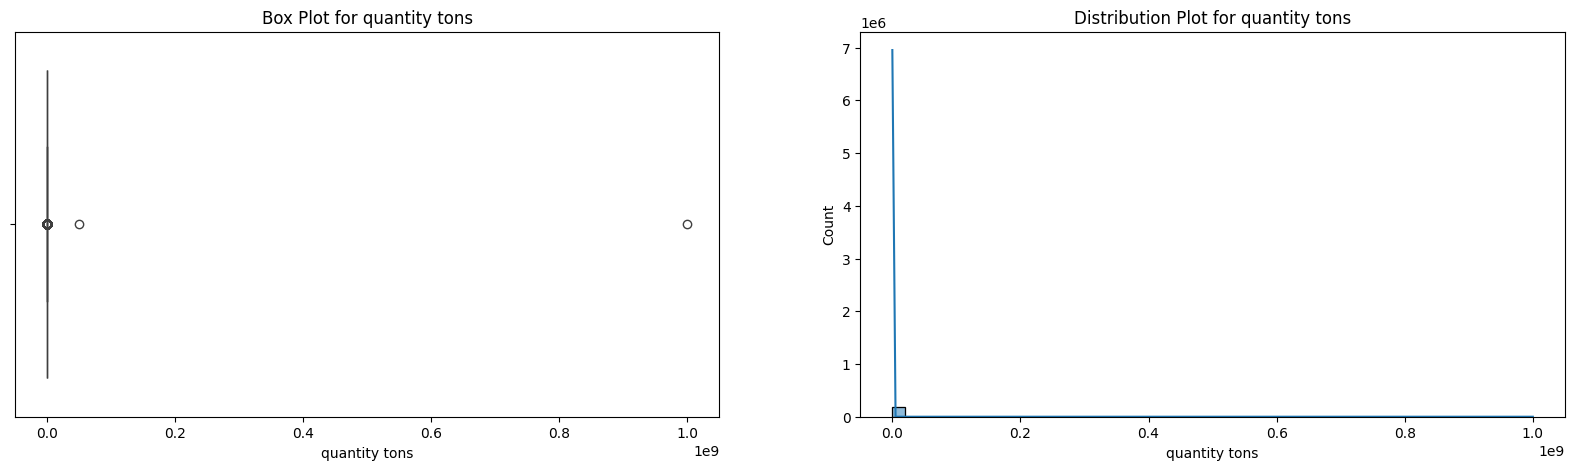

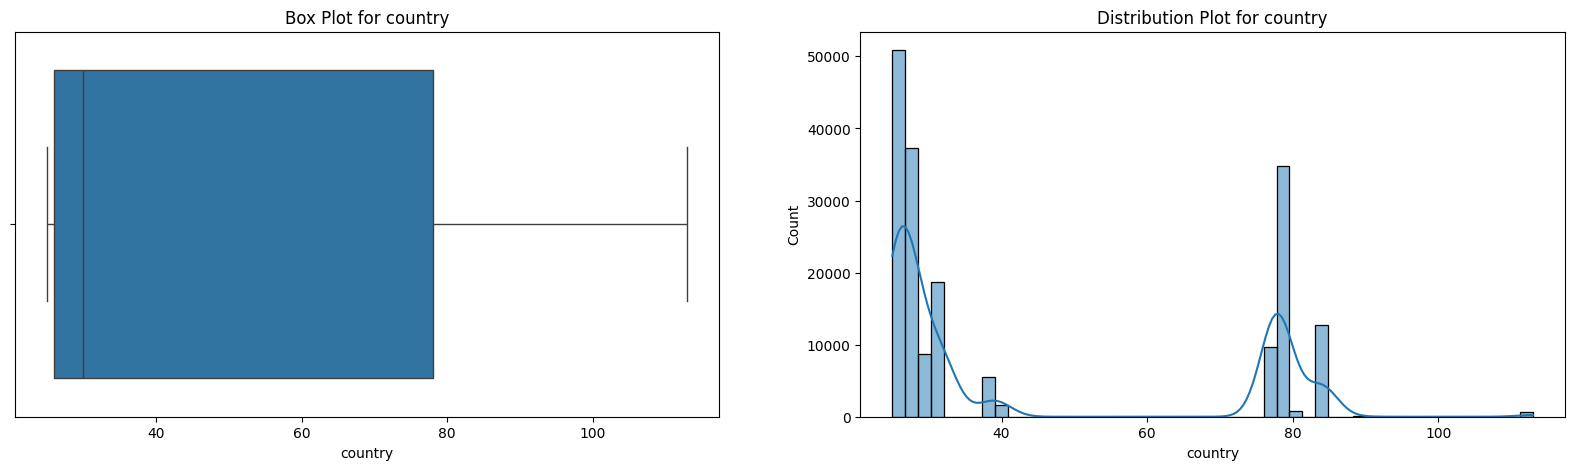

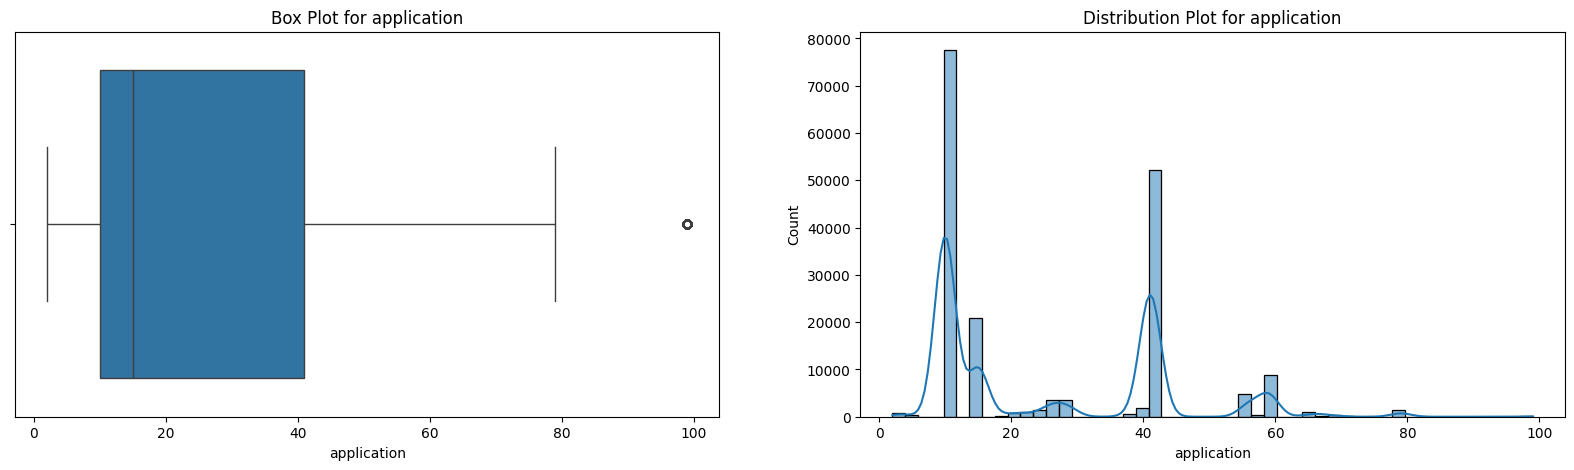

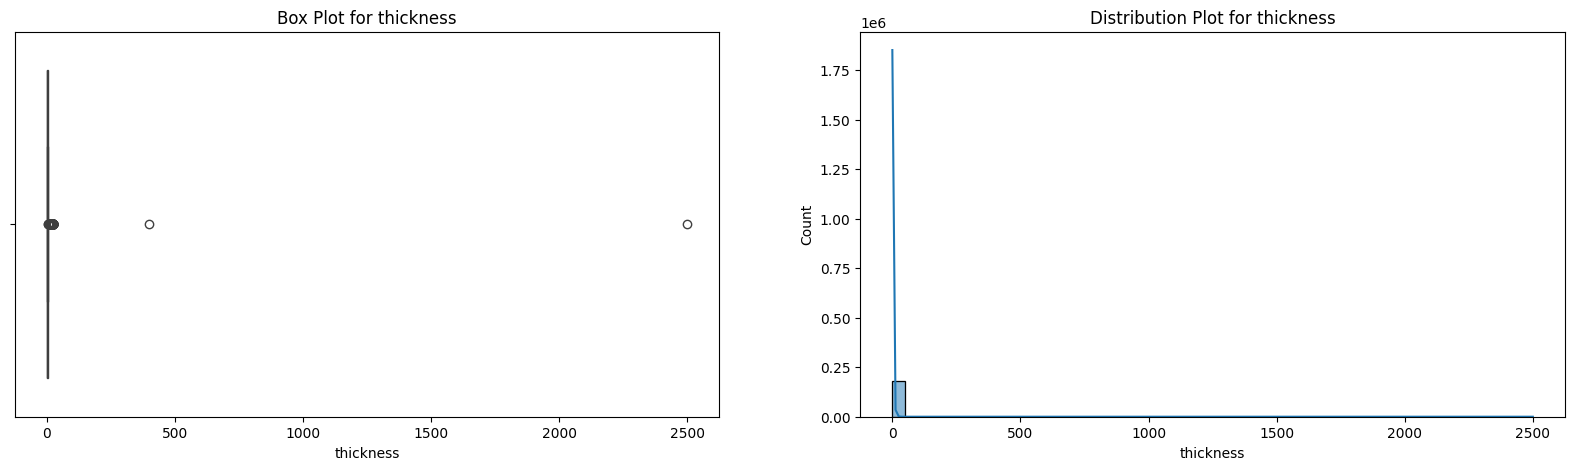

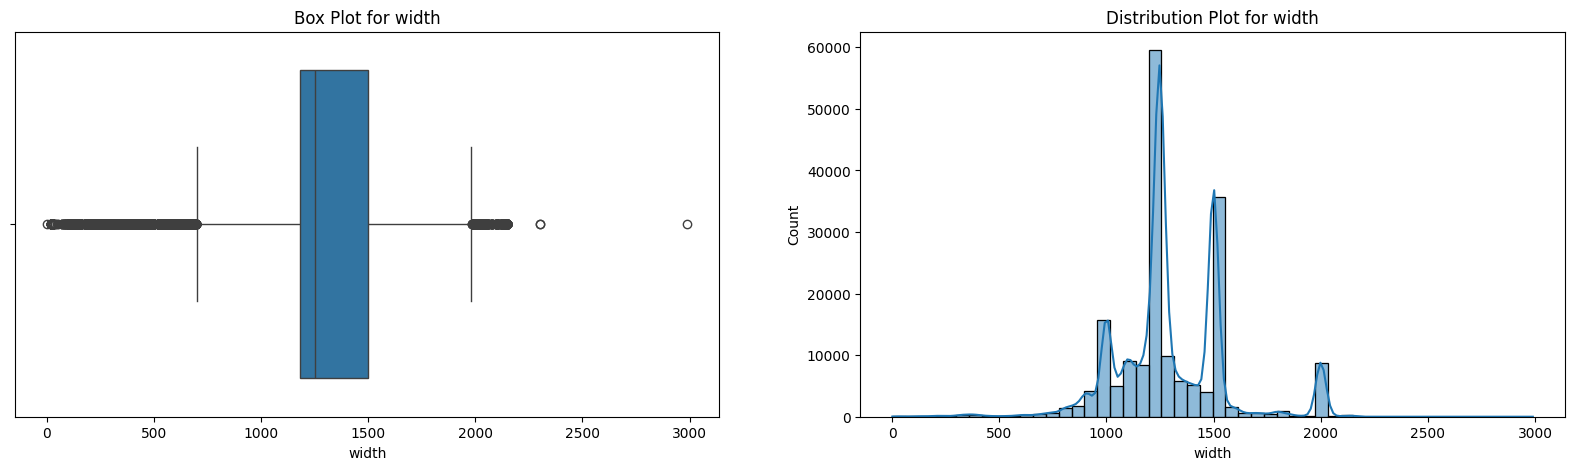

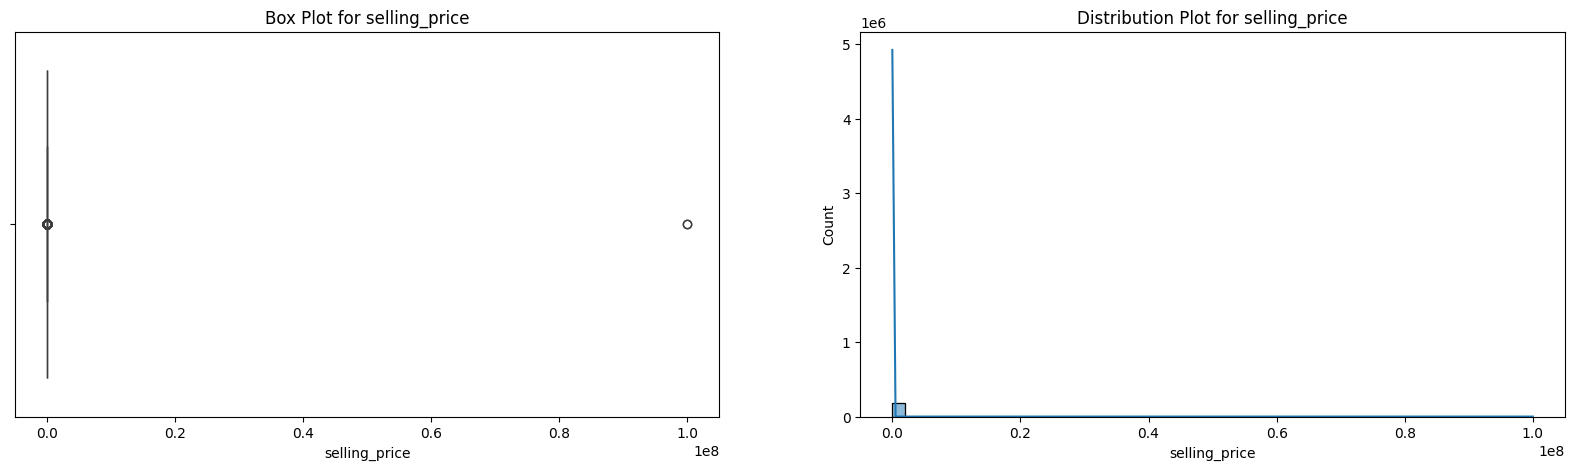

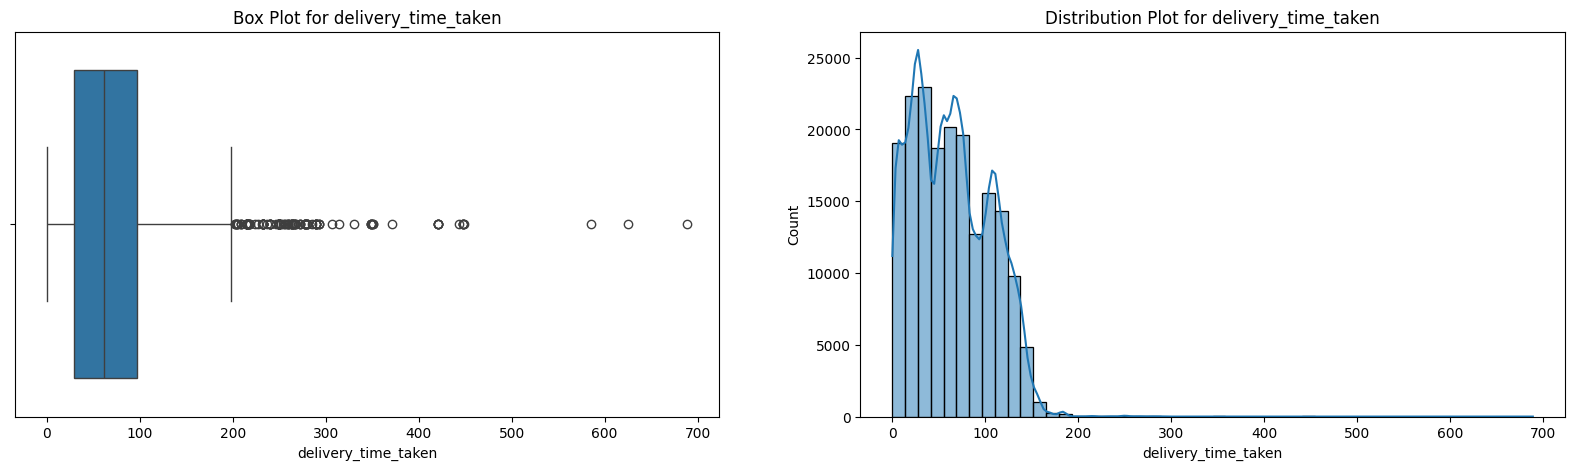

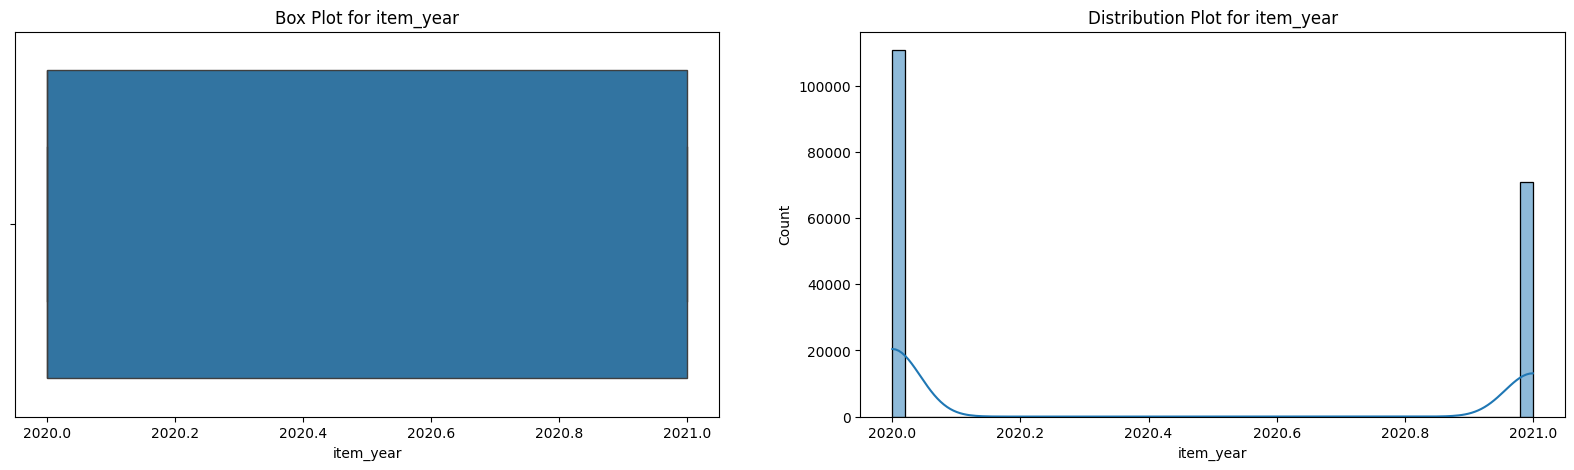

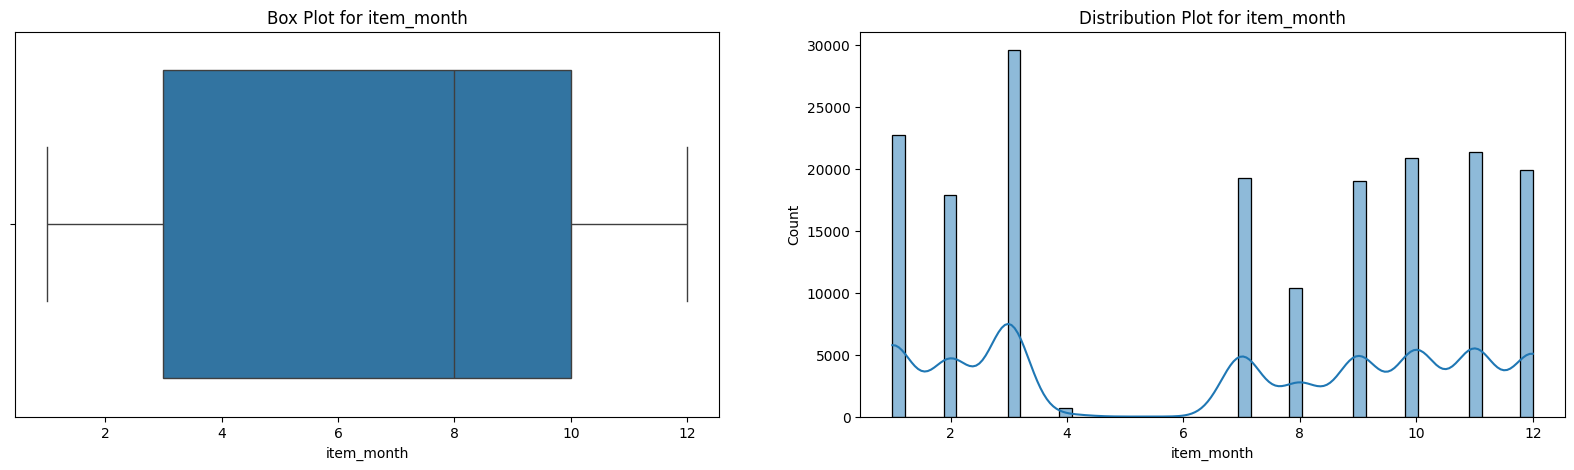

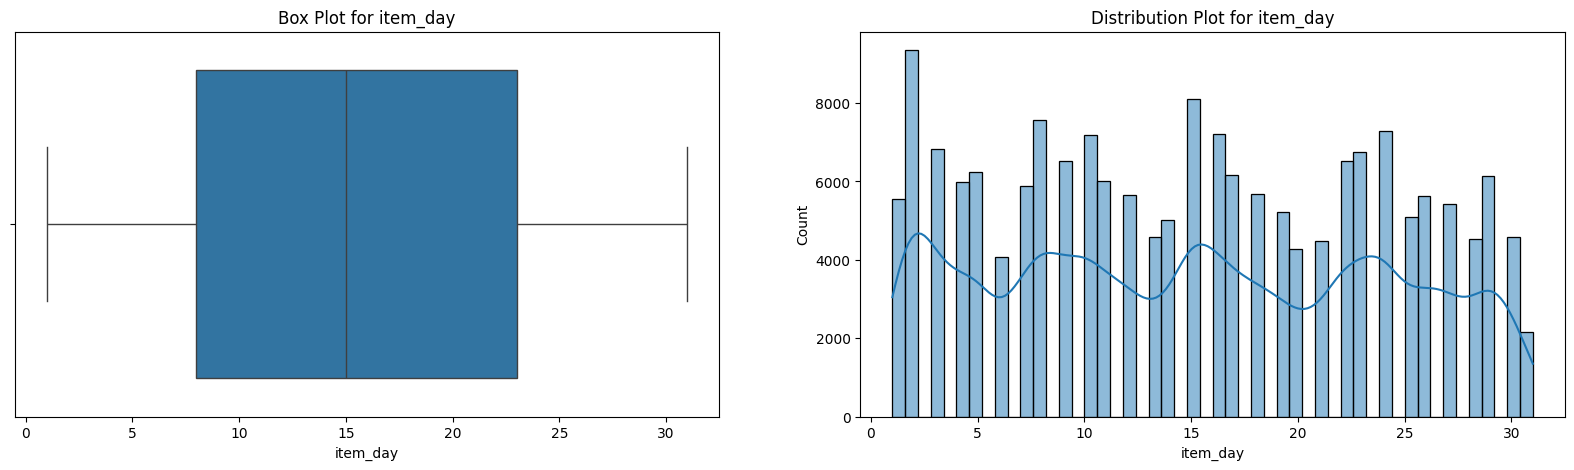

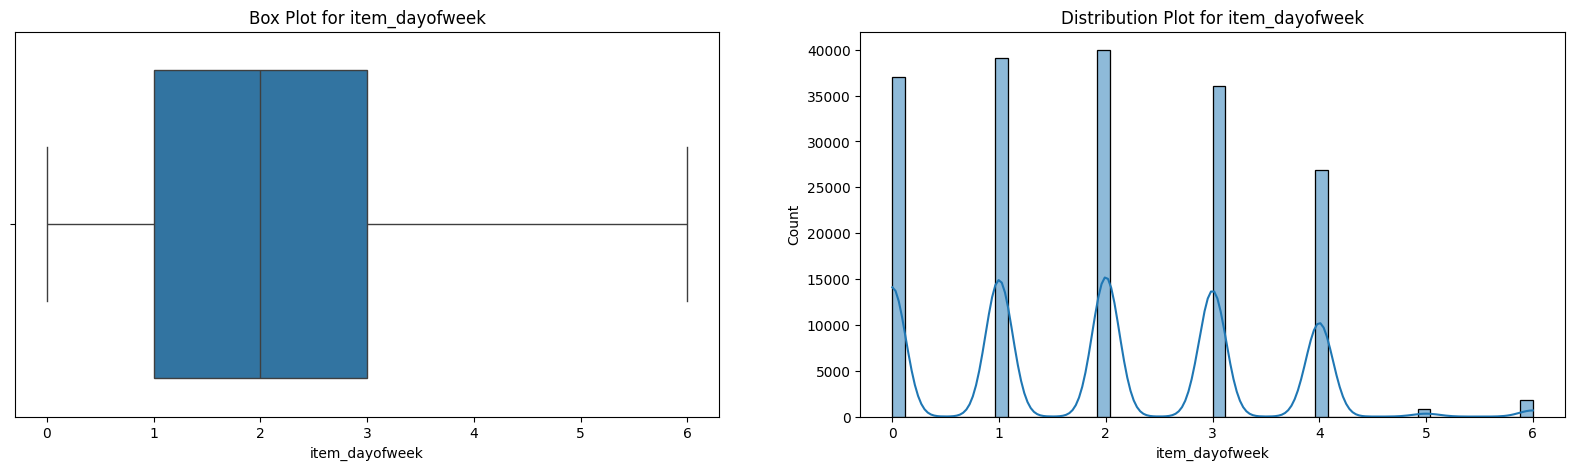

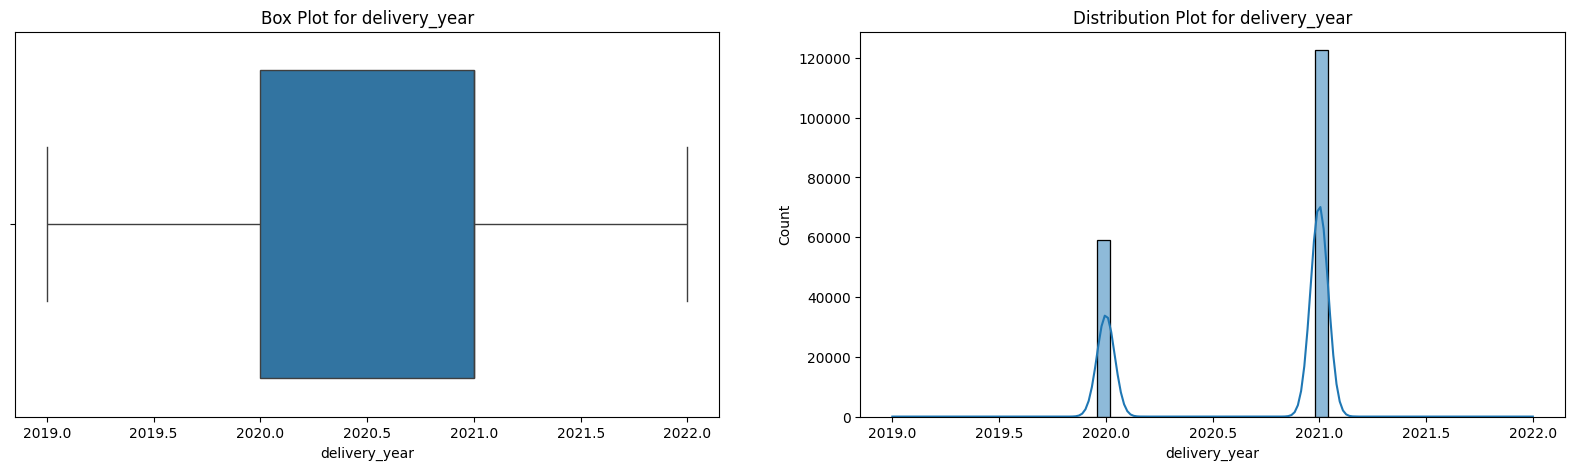

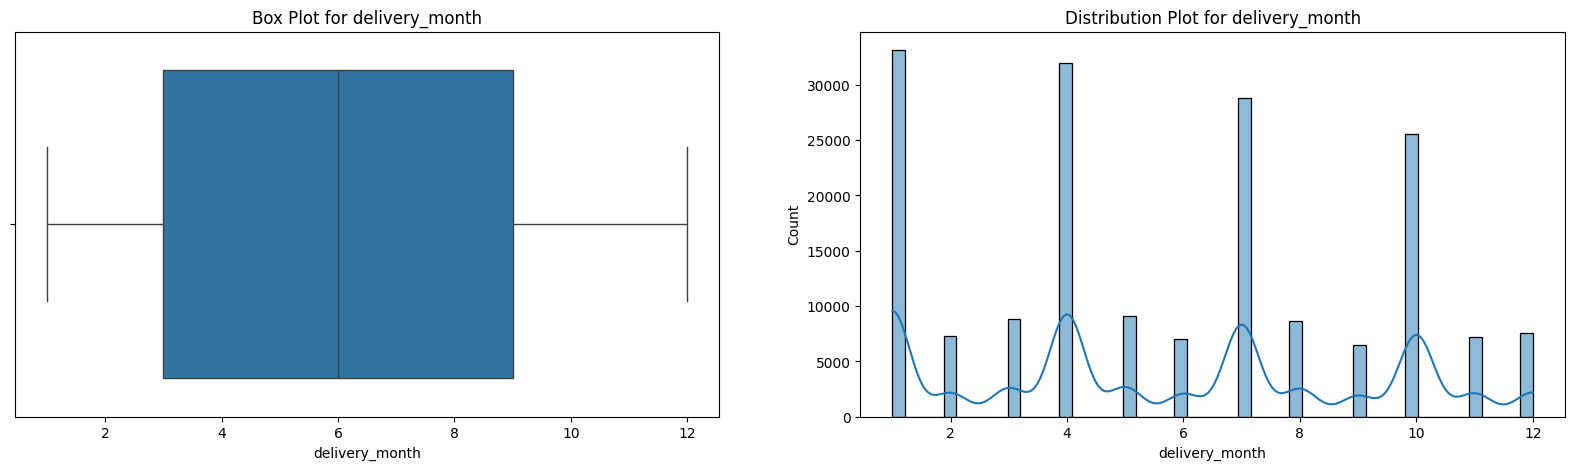

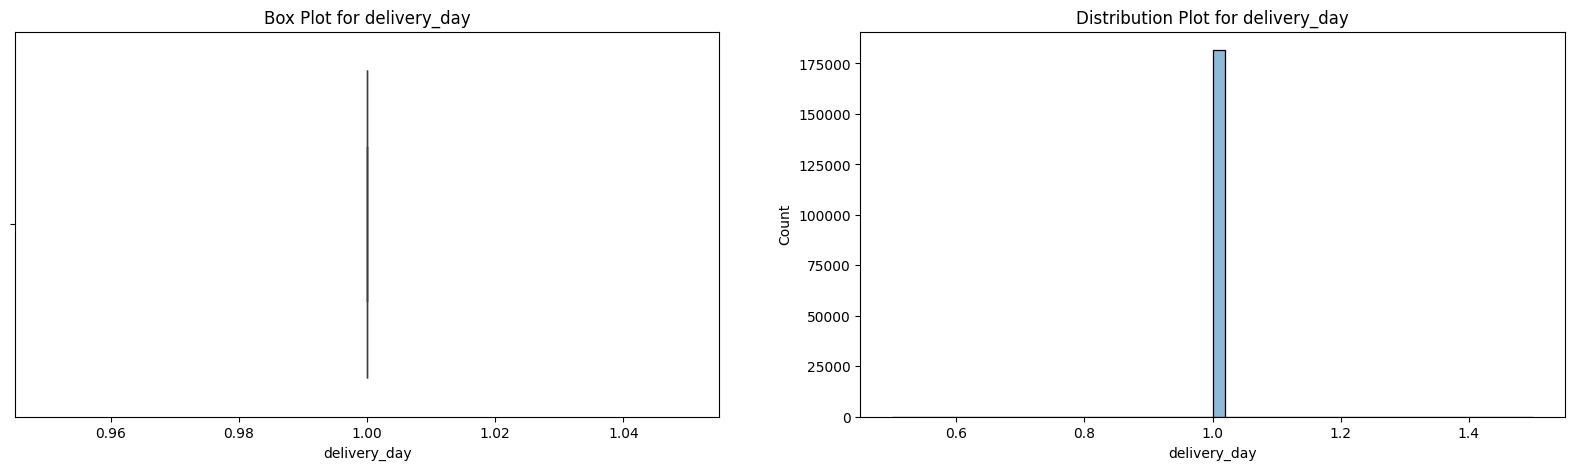

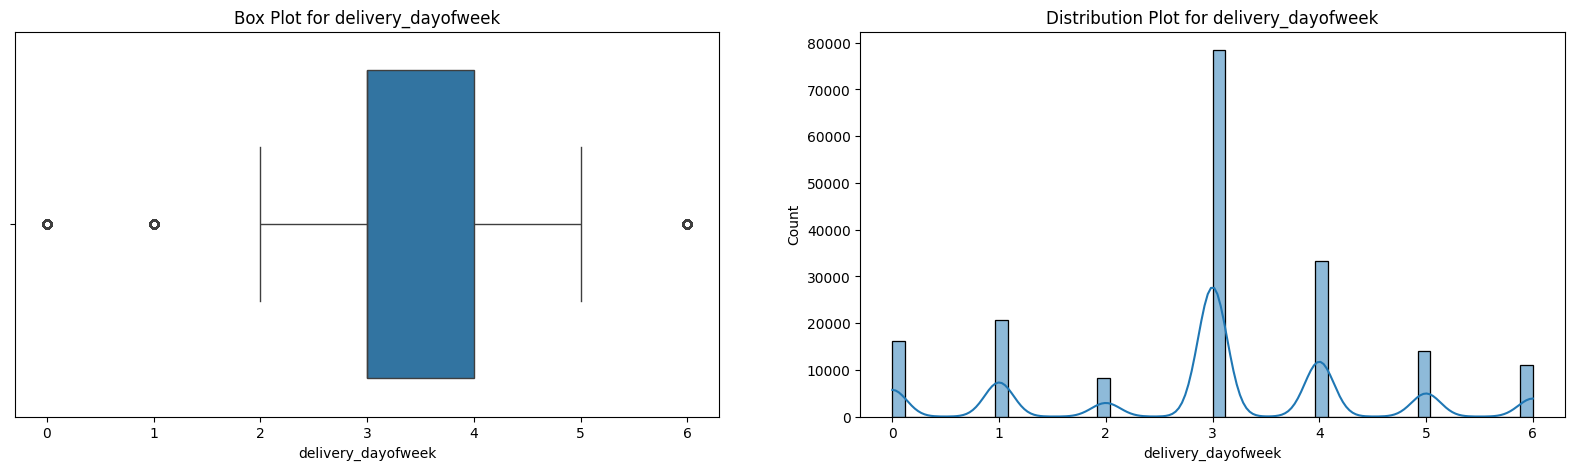

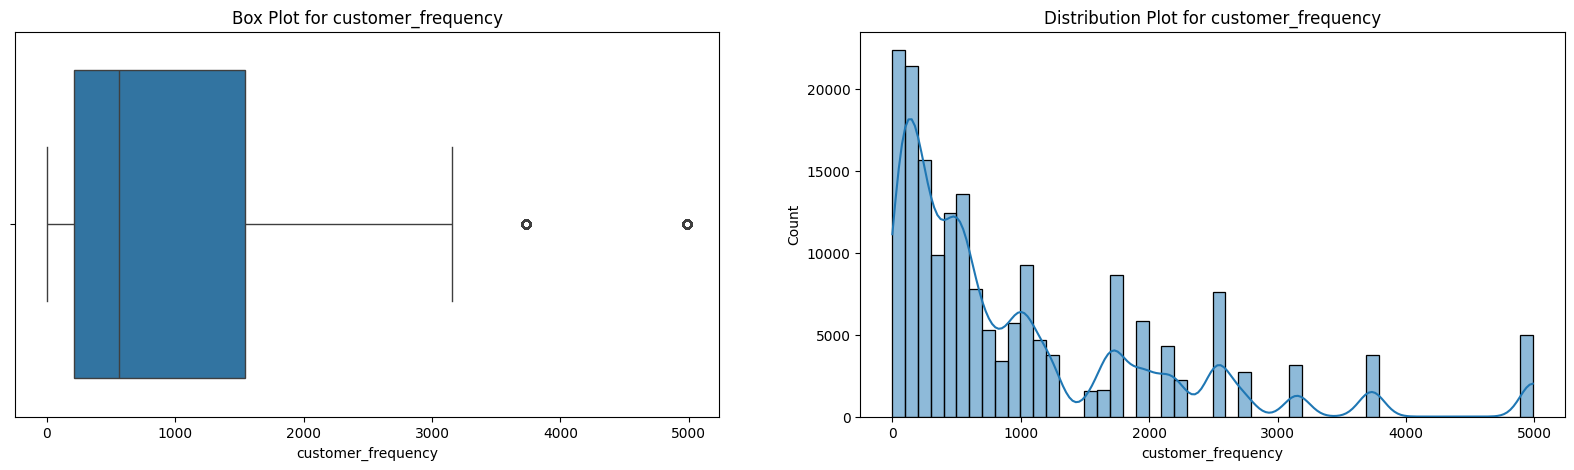

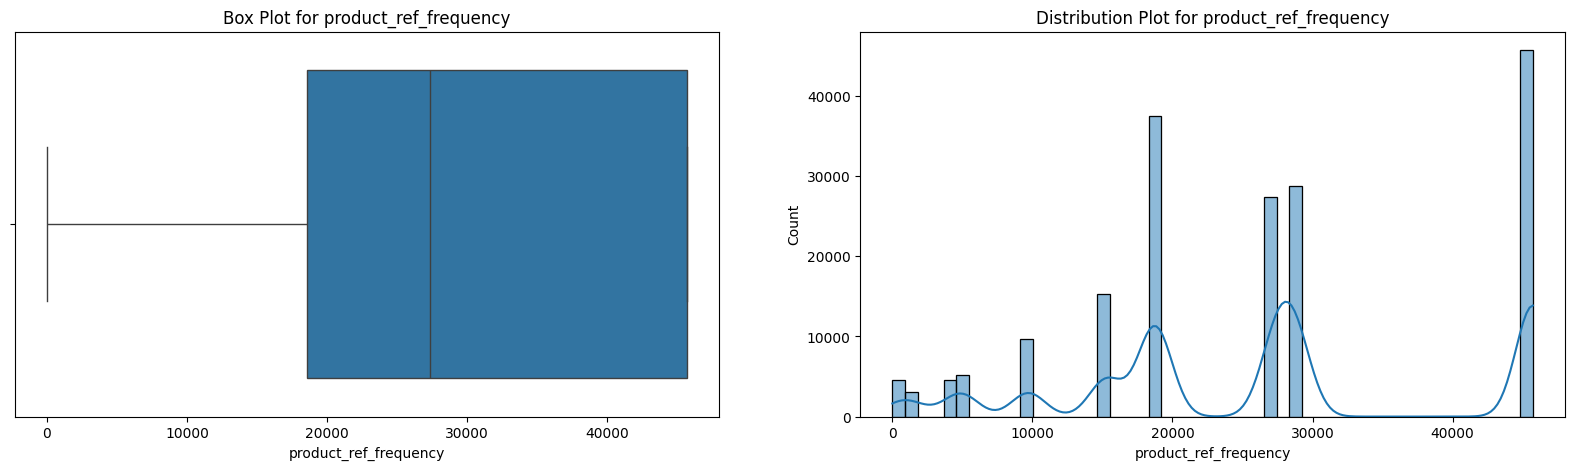

In [113]:
# function for box plot, hist plot, violin plot to understand through visualize

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

col = ['quantity tons', 'country', 'application',
        'thickness', 'width', 'selling_price', 'delivery_time_taken',
        'item_year', 'item_month', 'item_day', 'item_dayofweek',
        'delivery_year', 'delivery_month', 'delivery_day', 'delivery_dayofweek',
        'customer_frequency', 'product_ref_frequency']
for i in col:
    plot(df, i)

In [114]:
highly_skewed_columns = ['quantity tons', 'thickness', 'selling_price', 'customer_frequency']

df_log_transformed = df.copy()

# Log Transformation (add small value to avoid log(0))
for col in highly_skewed_columns:
    df_log_transformed[col] = np.log1p(df[col])  # log(x + 1)

# Check skewness after transformations
print("Skewness After Log Transformation:")
print(df_log_transformed[highly_skewed_columns].skew())




Skewness After Log Transformation:
quantity tons         0.338833
thickness             0.862494
selling_price        -5.275578
customer_frequency   -0.581392
dtype: float64


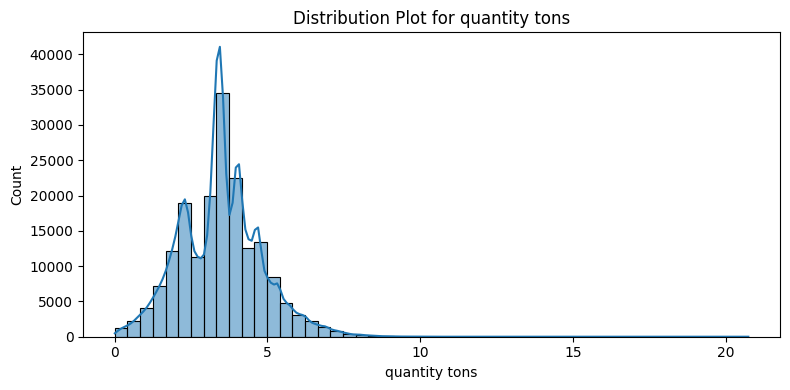

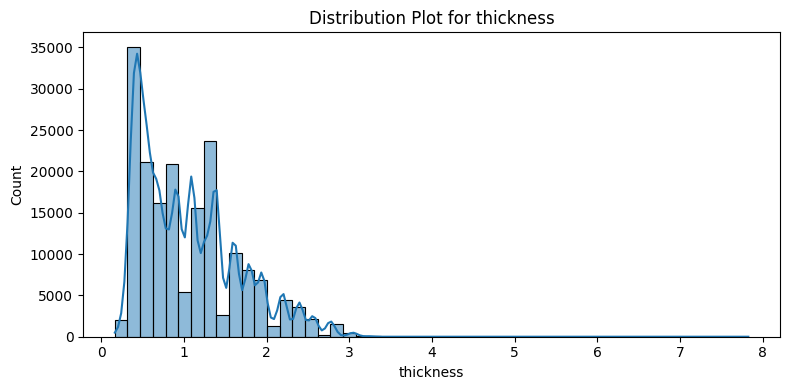

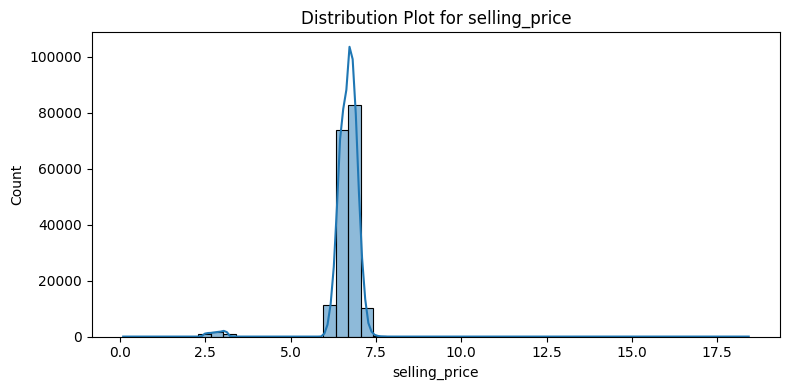

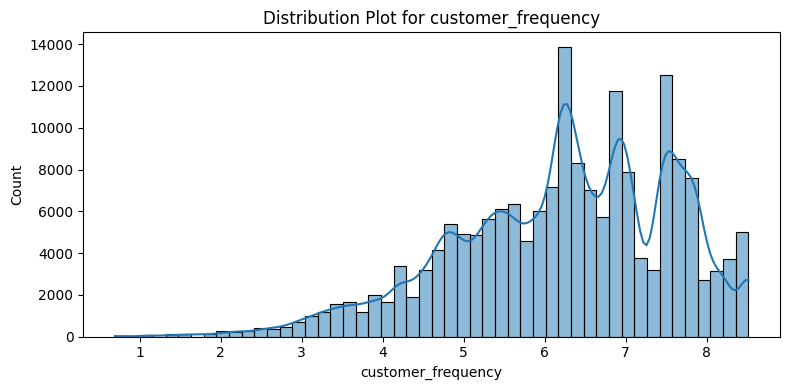

In [115]:
# function for box plot, hist plot, violin plot to understand through visualize

def plot(df, column):
    plt.figure(figsize=(8, 4))  # Create a new figure for each plot
    sns.histplot(data=df, x=column, kde=True, bins=50)  # Plot histogram with KDE
    plt.title(f'Distribution Plot for {column}')
    plt.tight_layout()
    plt.show()

col = ['quantity tons','thickness','selling_price', 'customer_frequency']
for i in col:
    plot(df_log_transformed, i)

In [116]:
#outliers handle with IQR and cliping method 

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [117]:
# using outlier function handle the outliers for the below features

outlier(df_log_transformed,'quantity tons')
outlier(df_log_transformed,'thickness')
outlier(df_log_transformed,'selling_price')
outlier(df_log_transformed,'width')
df_log_transformed

,quantity tons,country,status,item type,application,thickness,width,selling_price,delivery_time_taken,item_year,item_month,item_day,item_dayofweek,delivery_year,delivery_month,delivery_day,delivery_dayofweek,customer_frequency,product_ref_frequency
0,4.010057,28,Won,W,10,1.098612,1500.0,6.751101,91,2021,4,1,3,2021,7,1,3,7.560080,18916
1,6.645117,25,Won,W,41,0.587787,1210.0,6.954639,0,2021,4,1,3,2021,4,1,3,7.852050,15284
2,5.958761,30,Won,WI,28,0.322083,952.0,6.469762,90,2021,4,1,3,2021,1,1,4,3.713572,18574
3,5.315224,32,Won,S,59,1.193922,1317.0,6.645091,90,2021,4,1,3,2021,1,1,4,4.882802,15284
4,6.667631,28,Won,W,10,1.609438,1980.0,6.359574,31,2021,4,1,3,2021,3,1,0,6.371612,27375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,4.639378,25,Won,W,41,0.672944,1220.0,6.383507,1,2020,7,2,3,2020,7,1,2,7.573531,28785
181669,5.342765,25,Won,W,41,0.667829,1500.0,6.380123,1,2020,7,2,3,2020,7,1,2,7.573531,28785
181670,1.656321,25,Won,W,41,0.536493,1250.0,6.429719,1,2020,7,2,3,2020,7,1,2,7.573531,28785
181671,3.445852,25,Won,W,41,0.615186,1250.0,6.400257,1,2020,7,2,3,2020,7,1,2,7.573531,28785


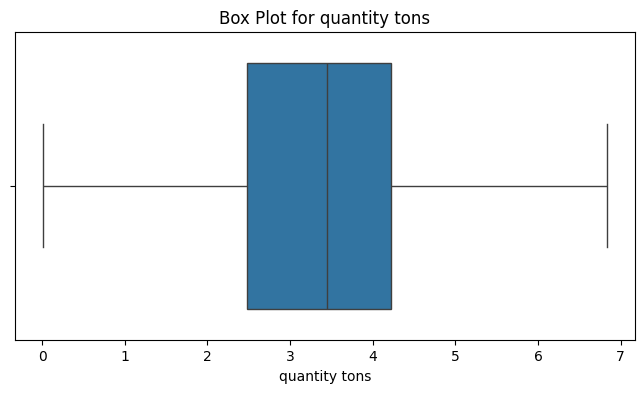

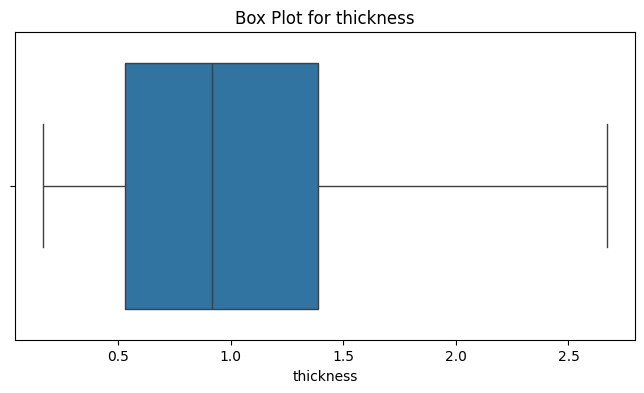

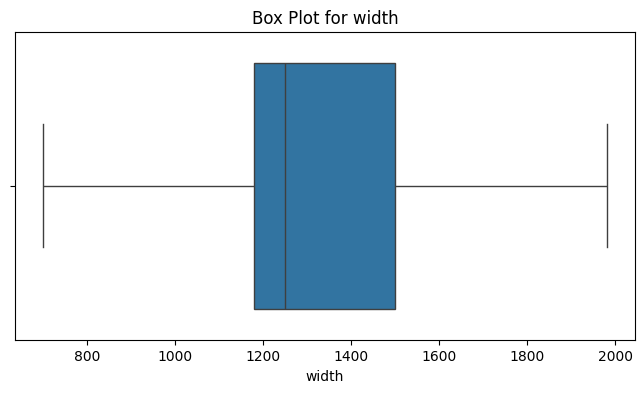

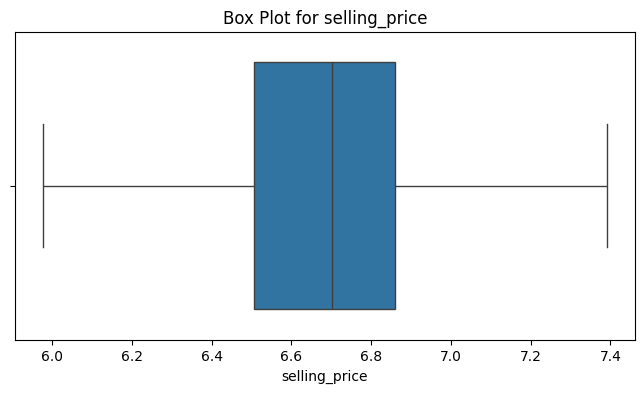

In [118]:
def plot(df, column):
    plt.figure(figsize=(8, 4))   
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')


col = ['quantity tons', 'thickness', 'width', 'selling_price']
for i in col:
    plot(df_log_transformed, i)

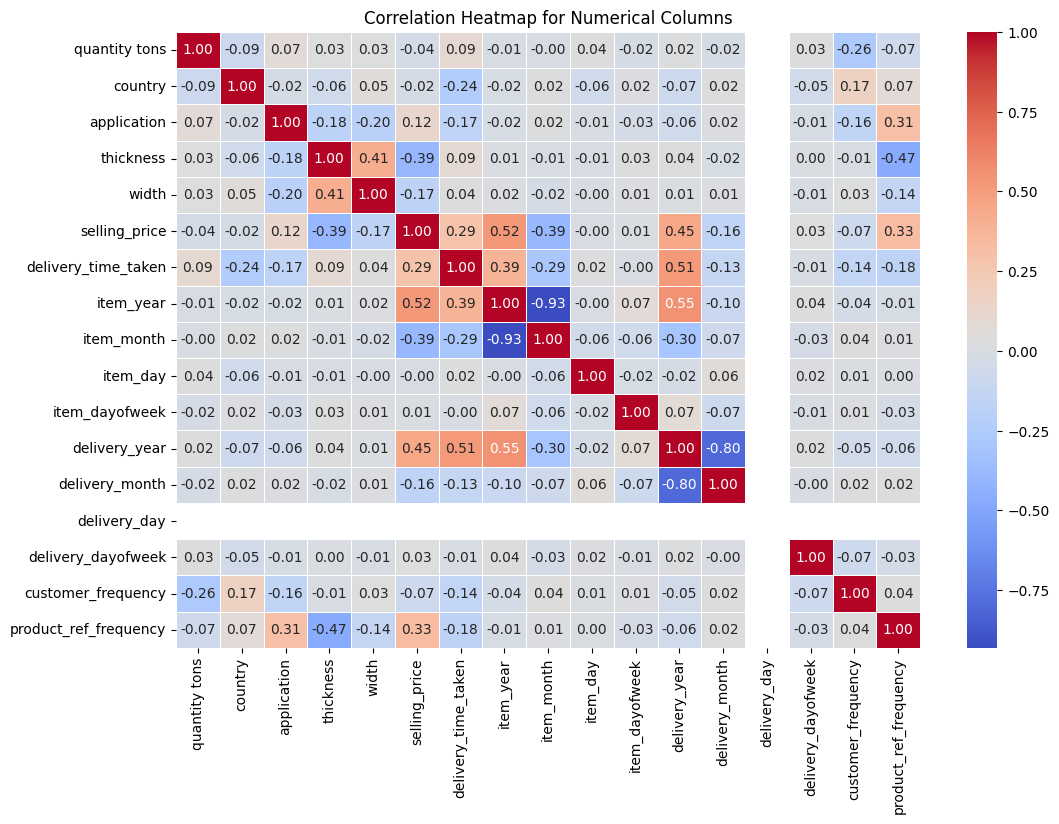

In [119]:
# verify any columns are highly correlated using Heatmap

df_numerical = df_log_transformed.select_dtypes(include=['number'])
corr_matrix = df_numerical.corr()

plt.figure(figsize=(12, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

# High correlation between features (e.g., above 0.8 or below -0.8) suggests that some features might be redundant,
# and you can consider removing one of them to avoid multicollinearity.

In [120]:
df_log_transformed['delivery_day'].value_counts()

delivery_day
1    181673
Name: count, dtype: int64

In [121]:
df_log_transformed.drop(columns=['delivery_day', 'delivery_month','item_month'], inplace=True)

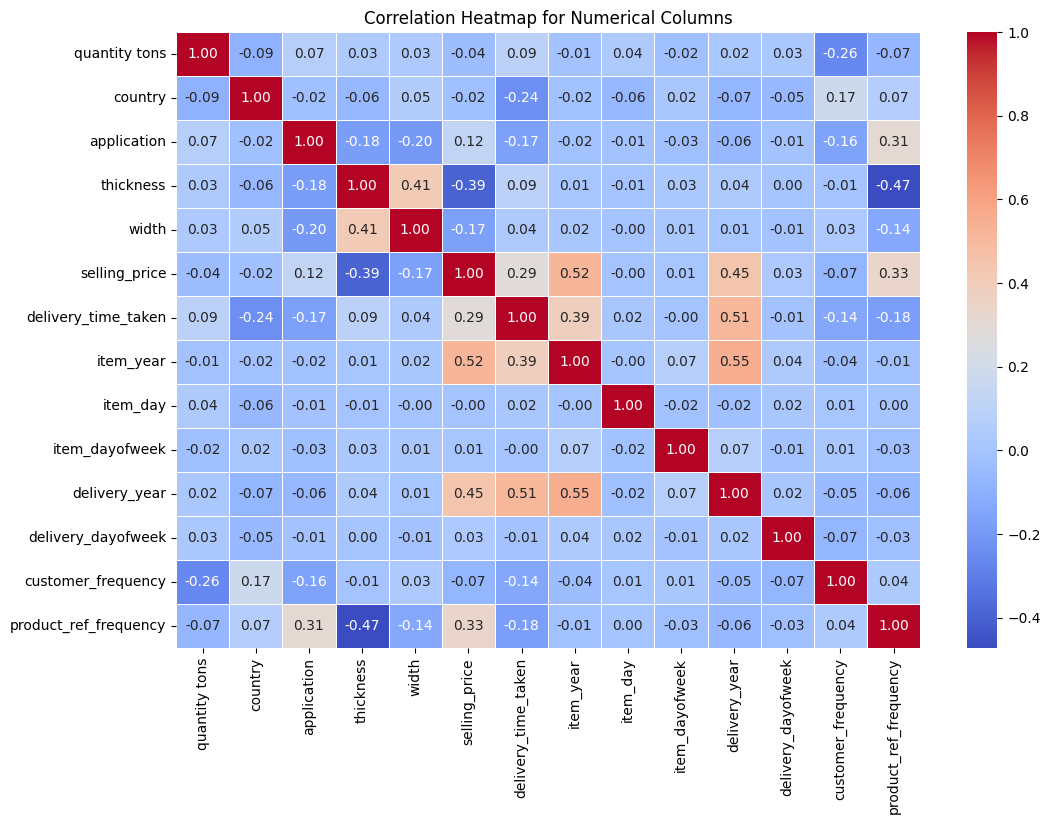

In [122]:
df_numerical = df_log_transformed.select_dtypes(include=['number'])
corr_matrix = df_numerical.corr()

plt.figure(figsize=(12, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

In [123]:
df_log_transformed.head()

,quantity tons,country,status,item type,application,thickness,width,selling_price,delivery_time_taken,item_year,item_day,item_dayofweek,delivery_year,delivery_dayofweek,customer_frequency,product_ref_frequency
0,4.010057,28,Won,W,10,1.098612,1500.0,6.751101,91,2021,1,3,2021,3,7.560080,18916
1,6.645117,25,Won,W,41,0.587787,1210.0,6.954639,0,2021,1,3,2021,3,7.852050,15284
2,5.958761,30,Won,WI,28,0.322083,952.0,6.469762,90,2021,1,3,2021,4,3.713572,18574
3,5.315224,32,Won,S,59,1.193922,1317.0,6.645091,90,2021,1,3,2021,4,4.882802,15284
4,6.667631,28,Won,W,10,1.609438,1980.0,6.359574,31,2021,1,3,2021,0,6.371612,27375


MODELLING

In [130]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from scipy.stats import randint
import pickle

In [126]:
df_log_transformed_m = df_log_transformed.copy()

In [127]:
df_log_transformed_m

,quantity tons,country,status,item type,application,thickness,width,selling_price,delivery_time_taken,item_year,item_day,item_dayofweek,delivery_year,delivery_dayofweek,customer_frequency,product_ref_frequency
0,4.010057,28,Won,W,10,1.098612,1500.0,6.751101,91,2021,1,3,2021,3,7.560080,18916
1,6.645117,25,Won,W,41,0.587787,1210.0,6.954639,0,2021,1,3,2021,3,7.852050,15284
2,5.958761,30,Won,WI,28,0.322083,952.0,6.469762,90,2021,1,3,2021,4,3.713572,18574
3,5.315224,32,Won,S,59,1.193922,1317.0,6.645091,90,2021,1,3,2021,4,4.882802,15284
4,6.667631,28,Won,W,10,1.609438,1980.0,6.359574,31,2021,1,3,2021,0,6.371612,27375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,4.639378,25,Won,W,41,0.672944,1220.0,6.383507,1,2020,2,3,2020,2,7.573531,28785
181669,5.342765,25,Won,W,41,0.667829,1500.0,6.380123,1,2020,2,3,2020,2,7.573531,28785
181670,1.656321,25,Won,W,41,0.536493,1250.0,6.429719,1,2020,2,3,2020,2,7.573531,28785
181671,3.445852,25,Won,W,41,0.615186,1250.0,6.400257,1,2020,2,3,2020,2,7.573531,28785


In [128]:
df_log_transformed_m['item type'].value_counts()

item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

In [131]:
# Since the categories do not have inherent ranking we cannot apply ordinal encoding here.Hence we will do Label Encoding

label_encoder = LabelEncoder()
df_log_transformed_m['item type'] = label_encoder.fit_transform(df_log_transformed_m['item type'])


In [134]:
df_log_transformed_m['item type'].value_counts()

item type
5    105615
3     69236
2      5660
1       610
6       524
0        27
4         1
Name: count, dtype: int64

In [135]:
df_log_transformed_m.head()

,quantity tons,country,status,item type,application,thickness,width,selling_price,delivery_time_taken,item_year,item_day,item_dayofweek,delivery_year,delivery_dayofweek,customer_frequency,product_ref_frequency
0,4.010057,28,Won,5,10,1.098612,1500.0,6.751101,91,2021,1,3,2021,3,7.560080,18916
1,6.645117,25,Won,5,41,0.587787,1210.0,6.954639,0,2021,1,3,2021,3,7.852050,15284
2,5.958761,30,Won,6,28,0.322083,952.0,6.469762,90,2021,1,3,2021,4,3.713572,18574
3,5.315224,32,Won,3,59,1.193922,1317.0,6.645091,90,2021,1,3,2021,4,4.882802,15284
4,6.667631,28,Won,5,10,1.609438,1980.0,6.359574,31,2021,1,3,2021,0,6.371612,27375


In [136]:
df_log_transformed_m['status'].value_counts()

status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [137]:
# using map function encoding the values in status column

df_log_transformed_m["status"]= df_log_transformed_m["status"].map({'Lost':0,'Won':1, 'Draft':5, 'To be approved':4, 
                                                                    'Not lost for AM':2, 'Wonderful':8, 'Revised':3,
                                                                    'Offered':6, 'Offerable':7})
df_log_transformed_m['status'].unique()

array([1, 5, 4, 0, 2, 8, 3, 6, 7])

In [138]:
df_log_transformed_m.head()

,quantity tons,country,status,item type,application,thickness,width,selling_price,delivery_time_taken,item_year,item_day,item_dayofweek,delivery_year,delivery_dayofweek,customer_frequency,product_ref_frequency
0,4.010057,28,1,5,10,1.098612,1500.0,6.751101,91,2021,1,3,2021,3,7.560080,18916
1,6.645117,25,1,5,41,0.587787,1210.0,6.954639,0,2021,1,3,2021,3,7.852050,15284
2,5.958761,30,1,6,28,0.322083,952.0,6.469762,90,2021,1,3,2021,4,3.713572,18574
3,5.315224,32,1,3,59,1.193922,1317.0,6.645091,90,2021,1,3,2021,4,4.882802,15284
4,6.667631,28,1,5,10,1.609438,1980.0,6.359574,31,2021,1,3,2021,0,6.371612,27375


In [146]:
# function to choose the best algorithm

def best_ML_algorithm(df,algorithms):
        x=df.drop(columns=['selling_price'],axis=1)
        y=df['selling_price']

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12, shuffle=True)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                
                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]  
        
        return best_algorithm, results        

In [147]:
# using above function try to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor,
            GradientBoostingRegressor, XGBRegressor]
best_algorithm, results = best_ML_algorithm(df_log_transformed_m, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                           Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                      0.122856            0.027497                 0.165822  0.578901
DecisionTreeRegressor                 0.037964            0.004550                 0.067453  0.930321
ExtraTreesRegressor                   0.029809            0.002549                 0.050486  0.960967
RandomForestRegressor                 0.031183            0.002582                 0.050810  0.960464
GradientBoostingRegressor             0.065942            0.007793                 0.088278  0.880656
XGBRegressor                          0.041386            0.003475                 0.058952  0.946777
**Best Algorithm:** ExtraTreesRegressor


In [61]:
# hyper parameter tuning to identify the best parameter using gridsearch cv

# x=df_log_transformed_m.drop(columns=['selling_price'],axis=1)
# y=df_log_transformed_m['selling_price']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

# param_grid = { 
#     'n_estimators' :[100,150],
#     'max_depth': [10,20],     
#     'min_samples_split': [2,4], 
#     'min_samples_leaf': [1,2],
#     'max_features'    : ['sqrt', 'log2', None] }


# grid_search = GridSearchCV(estimator=RandomForestRegressor(),
#                             param_grid=param_grid, cv=3, n_jobs=-1)
# grid_search.fit(x_train, y_train)

# grid_search.best_params_,grid_search.best_score_

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 4,
  'n_estimators': 150},
 np.float64(0.9565352647708179))

In [155]:
x=df_log_transformed_m.drop(columns=['selling_price'],axis=1)
y=df_log_transformed_m['selling_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

randomized_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1)
randomized_search.fit(x_train, y_train)

randomized_search.best_params_, randomized_search.best_score_

({'max_depth': 28,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 7,
  'n_estimators': 340},
 np.float64(0.94791848470594))

In [156]:
# with best algorithm matching the parameter from above result and train the model

x=df_log_transformed_m.drop(columns=['selling_price'],axis=1)
y=df_log_transformed_m['selling_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

model_regressor = RandomForestRegressor(n_estimators=340, max_features='sqrt', max_depth=28, min_samples_leaf=2,
                                        min_samples_split=7, random_state=12)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.03615734237747416
Mean Squared Error: 0.0029627787313729168
Root Mean Squared Error: 0.05443141309366235
R-squared: 0.9546267517807725


In [157]:
#checking the features scores

feature_scores = pd.Series(model_regressor.feature_importances_, index=x_train.columns)
feature_scores

quantity tons            0.018109
country                  0.027822
status                   0.152410
item type                0.007218
application              0.026476
thickness                0.115937
width                    0.021673
delivery_time_taken      0.057443
item_year                0.183032
item_day                 0.017759
item_dayofweek           0.009195
delivery_year            0.112483
delivery_dayofweek       0.038123
customer_frequency       0.025970
product_ref_frequency    0.186351
dtype: float64

In [158]:
#checking the features scores

feature_scores = pd.Series(model_regressor.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

product_ref_frequency    0.186351
item_year                0.183032
status                   0.152410
thickness                0.115937
delivery_year            0.112483
delivery_time_taken      0.057443
delivery_dayofweek       0.038123
country                  0.027822
application              0.026476
customer_frequency       0.025970
width                    0.021673
quantity tons            0.018109
item_day                 0.017759
item_dayofweek           0.009195
item type                0.007218
dtype: float64

In [159]:
# store the model using pickle

with open('Regressor.pkl','wb') as files:
    pickle.dump(model_regressor,files)

In [160]:
df_log_transformed_m

,quantity tons,country,status,item type,application,thickness,width,selling_price,delivery_time_taken,item_year,item_day,item_dayofweek,delivery_year,delivery_dayofweek,customer_frequency,product_ref_frequency
0,4.010057,28,1,5,10,1.098612,1500.0,6.751101,91,2021,1,3,2021,3,7.560080,18916
1,6.645117,25,1,5,41,0.587787,1210.0,6.954639,0,2021,1,3,2021,3,7.852050,15284
2,5.958761,30,1,6,28,0.322083,952.0,6.469762,90,2021,1,3,2021,4,3.713572,18574
3,5.315224,32,1,3,59,1.193922,1317.0,6.645091,90,2021,1,3,2021,4,4.882802,15284
4,6.667631,28,1,5,10,1.609438,1980.0,6.359574,31,2021,1,3,2021,0,6.371612,27375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,4.639378,25,1,5,41,0.672944,1220.0,6.383507,1,2020,2,3,2020,2,7.573531,28785
181669,5.342765,25,1,5,41,0.667829,1500.0,6.380123,1,2020,2,3,2020,2,7.573531,28785
181670,1.656321,25,1,5,41,0.536493,1250.0,6.429719,1,2020,2,3,2020,2,7.573531,28785
181671,3.445852,25,1,5,41,0.615186,1250.0,6.400257,1,2020,2,3,2020,2,7.573531,28785


In [162]:
#load the pickle and predict the selling price with regressor model

with open('Regressor.pkl','rb') as files:
    predict_model=pickle.load(files)

pre=predict_model.predict(np.array([[4.01, 28, 1, 5,10,1.09,1500,91,2021,1,3,2021,3,7.56,18916]]))
np.exp(pre[0])
# Actual Value 854

d:\DATA SCIENCE\Data Science - GUVI\Capstone\Capstone 4 - Industrial Copper Modeling\Industrial_Copper_Project\myenv_copper\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(877.8163397585722)

In [163]:
with open('Regressor.pkl','rb') as files:
    predict_model=pickle.load(files)

pre=predict_model.predict(np.array([[6.645117,25,1,5,41,0.587787,1210.0,0,2021,1,3,2021,3,7.852050,15284]]))
np.exp(pre[0])
#Actual Price = 1047

d:\DATA SCIENCE\Data Science - GUVI\Capstone\Capstone 4 - Industrial Copper Modeling\Industrial_Copper_Project\myenv_copper\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(1002.8613796639095)

In [164]:
df_log_transformed_m.head()

,quantity tons,country,status,item type,application,thickness,width,selling_price,delivery_time_taken,item_year,item_day,item_dayofweek,delivery_year,delivery_dayofweek,customer_frequency,product_ref_frequency
0,4.010057,28,1,5,10,1.098612,1500.0,6.751101,91,2021,1,3,2021,3,7.560080,18916
1,6.645117,25,1,5,41,0.587787,1210.0,6.954639,0,2021,1,3,2021,3,7.852050,15284
2,5.958761,30,1,6,28,0.322083,952.0,6.469762,90,2021,1,3,2021,4,3.713572,18574
3,5.315224,32,1,3,59,1.193922,1317.0,6.645091,90,2021,1,3,2021,4,4.882802,15284
4,6.667631,28,1,5,10,1.609438,1980.0,6.359574,31,2021,1,3,2021,0,6.371612,27375


In [165]:
# Classifier Model to Predict Status

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

In [166]:
#filter out the values (won|lost) in status column

df_c=df_log_transformed_m[(df_log_transformed_m.status==1)|(df_log_transformed_m.status==0)]
df_c

,quantity tons,country,status,item type,application,thickness,width,selling_price,delivery_time_taken,item_year,item_day,item_dayofweek,delivery_year,delivery_dayofweek,customer_frequency,product_ref_frequency
0,4.010057,28,1,5,10,1.098612,1500.0,6.751101,91,2021,1,3,2021,3,7.560080,18916
1,6.645117,25,1,5,41,0.587787,1210.0,6.954639,0,2021,1,3,2021,3,7.852050,15284
2,5.958761,30,1,6,28,0.322083,952.0,6.469762,90,2021,1,3,2021,4,3.713572,18574
3,5.315224,32,1,3,59,1.193922,1317.0,6.645091,90,2021,1,3,2021,4,4.882802,15284
4,6.667631,28,1,5,10,1.609438,1980.0,6.359574,31,2021,1,3,2021,0,6.371612,27375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,4.639378,25,1,5,41,0.672944,1220.0,6.383507,1,2020,2,3,2020,2,7.573531,28785
181669,5.342765,25,1,5,41,0.667829,1500.0,6.380123,1,2020,2,3,2020,2,7.573531,28785
181670,1.656321,25,1,5,41,0.536493,1250.0,6.429719,1,2020,2,3,2020,2,7.573531,28785
181671,3.445852,25,1,5,41,0.615186,1250.0,6.400257,1,2020,2,3,2020,2,7.573531,28785


In [167]:
#checking balance of the status values

df_c['status'].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

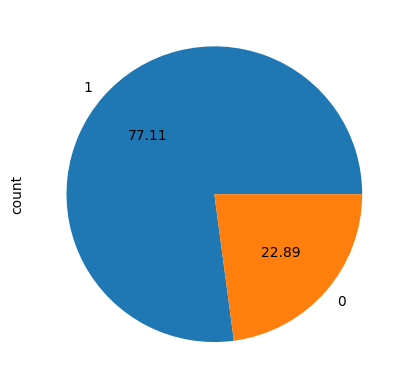

In [168]:
ax=df_c['status'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'over oversampling using smote')

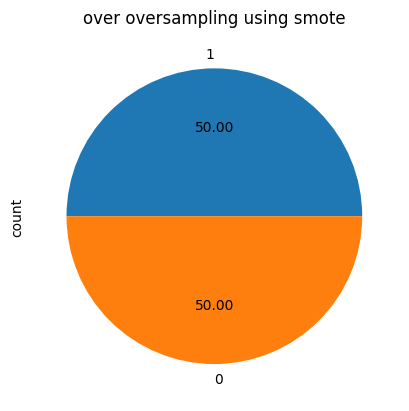

In [169]:
# oversampling the data using SMOTE 

x=df_c.drop('status',axis=1)
y=df_c['status']

smote= SMOTE()

x_smote, y_smote = smote.fit_resample(x,y) 

ax=y_smote.value_counts().plot.pie(autopct='%.2f')
ax.set_title('over oversampling using smote')

In [170]:
#function to get the best classifier algorithm

def best_ML_class_algo(x_smote,y_smote,algorithms):
        
        x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=12)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)

                accuracy =metrics. accuracy_score(y_test, y_pred)
                precision =metrics. precision_score(y_test, y_pred)
                recall =metrics. recall_score(y_test, y_pred)
                f1 = metrics.f1_score(y_test, y_pred)

                results[algorithm.__name__] = {'Accuracy score': accuracy,'Precision': precision,'Recall': recall,'F1-score': f1}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['Accuracy score'])[0]  
        
        return best_algorithm, results  

In [171]:
# using above function try to identify the best algorithm

algorithms = [ DecisionTreeClassifier, ExtraTreesClassifier, RandomForestClassifier,
            GradientBoostingClassifier, XGBClassifier]
best_algorithm, results = best_ML_class_algo(x_smote,y_smote, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                            Accuracy score  Precision    Recall  F1-score
DecisionTreeClassifier            0.959358   0.959537  0.958789  0.959163
ExtraTreesClassifier              0.982373   0.990059  0.974373  0.982154
RandomForestClassifier            0.979629   0.988218  0.970650  0.979355
GradientBoostingClassifier        0.821615   0.842125  0.789703  0.815072
XGBClassifier                     0.946141   0.963382  0.927044  0.944864
**Best Algorithm:** ExtraTreesClassifier


In [77]:
# # hyper parameter tuning to identify the best parameter using gridsearch cv

# x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=12)

# param_grid = {
#     'n_estimators' :[50,100],
#     'max_depth': [ 10,20,25],     
#     'min_samples_split': [2, 4],  
#     'min_samples_leaf': [1, 2]     }


# model = ExtraTreesClassifier(random_state=12) 

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="accuracy",n_jobs=-1)
# grid_search.fit(x_train, y_train)
# grid_search.best_params_,grid_search.best_score_





({'max_depth': 25,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 np.float64(0.9783765084846765))

In [172]:

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=12)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, 25],     
    'min_samples_split': [2, 4],  
    'min_samples_leaf': [1, 2]
}

model = ExtraTreesClassifier(random_state=12)

randomized_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=12
)

# Fit and get results
randomized_search.fit(x_train, y_train)
print("Best Parameters:", randomized_search.best_params_)
print("Best Score (CV):", randomized_search.best_score_)


Best Parameters: {'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 25}
Best Score (CV): 0.9962707908904905


In [173]:
# with best algorithm matching the parameter from bove result and train the model

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=12)

model_classifier = ExtraTreesClassifier(n_estimators=50,max_depth=25,min_samples_leaf=1,min_samples_split=4)
model_classifier.fit(x_train, y_train)

y_pred = model_classifier.predict(x_test)

# evaluation metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     34957
           1       0.99      0.96      0.97     34651

    accuracy                           0.98     69608
   macro avg       0.98      0.98      0.98     69608
weighted avg       0.98      0.98      0.98     69608



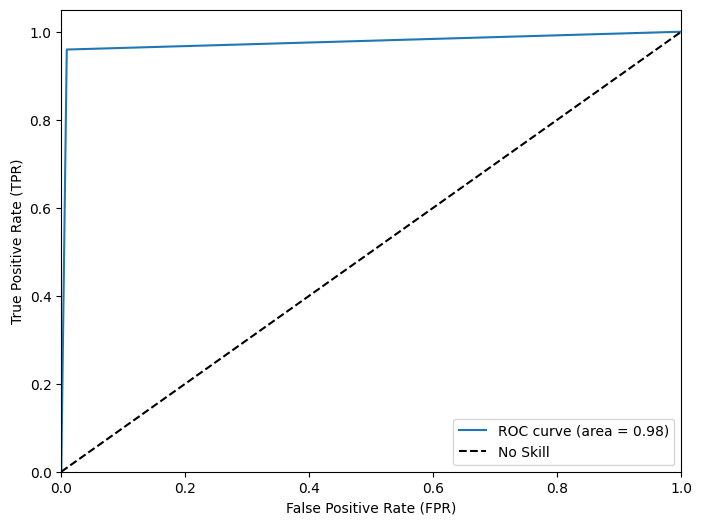

In [174]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
auc_curve=auc(x=fpr,y=tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_curve)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill') # Random Classifier Line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.show()

In [175]:
#checkig the features scores and importants

feature_scores = pd.Series(model_classifier.feature_importances_, index=x_train.columns)
feature_scores

quantity tons            0.059219
country                  0.084071
item type                0.117102
application              0.087074
thickness                0.045417
width                    0.030660
selling_price            0.046671
delivery_time_taken      0.123840
item_year                0.025414
item_day                 0.071114
item_dayofweek           0.055963
delivery_year            0.019567
delivery_dayofweek       0.056236
customer_frequency       0.106918
product_ref_frequency    0.070735
dtype: float64

In [176]:
#checkig the features scores and importants

feature_scores = pd.Series(model_classifier.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

delivery_time_taken      0.123840
item type                0.117102
customer_frequency       0.106918
application              0.087074
country                  0.084071
item_day                 0.071114
product_ref_frequency    0.070735
quantity tons            0.059219
delivery_dayofweek       0.056236
item_dayofweek           0.055963
selling_price            0.046671
thickness                0.045417
width                    0.030660
item_year                0.025414
delivery_year            0.019567
dtype: float64

In [177]:
# store the model using pickle

with open('Classifier.pkl','wb') as  files:
    pickle.dump(model_classifier,files)

In [178]:
df_c.head()

,quantity tons,country,status,item type,application,thickness,width,selling_price,delivery_time_taken,item_year,item_day,item_dayofweek,delivery_year,delivery_dayofweek,customer_frequency,product_ref_frequency
0,4.010057,28,1,5,10,1.098612,1500.0,6.751101,91,2021,1,3,2021,3,7.560080,18916
1,6.645117,25,1,5,41,0.587787,1210.0,6.954639,0,2021,1,3,2021,3,7.852050,15284
2,5.958761,30,1,6,28,0.322083,952.0,6.469762,90,2021,1,3,2021,4,3.713572,18574
3,5.315224,32,1,3,59,1.193922,1317.0,6.645091,90,2021,1,3,2021,4,4.882802,15284
4,6.667631,28,1,5,10,1.609438,1980.0,6.359574,31,2021,1,3,2021,0,6.371612,27375


In [179]:
# load the pickle and predict the status with classifier model

with open('Classifier.pkl','rb') as files:
    clas_model=pickle.load(files)

cla = clas_model.predict( np.array([[4.01,28,5,10,1.1,1500,6.75,91,2021,1,3,2021,3,7.56,18916]]))
if cla[0] == 1:
    print('Won')
else:
    print('Lose')

Won


d:\DATA SCIENCE\Data Science - GUVI\Capstone\Capstone 4 - Industrial Copper Modeling\Industrial_Copper_Project\myenv_copper\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [182]:
df_c['status'].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [181]:
df_c[df_c['status'] == 0].head()

,quantity tons,country,status,item type,application,thickness,width,selling_price,delivery_time_taken,item_year,item_day,item_dayofweek,delivery_year,delivery_dayofweek,customer_frequency,product_ref_frequency
171,2.274186,78,0,5,10,0.693147,1500.0,7.134094,91,2021,1,3,2021,3,7.144407,15284
174,3.702536,77,0,3,10,0.693147,1500.0,7.111512,122,2021,1,3,2021,6,7.395108,28785
175,2.521721,78,0,5,10,1.609438,1500.0,7.079184,91,2021,1,3,2021,3,7.144407,15284
176,3.654805,77,0,3,10,0.587787,1250.0,7.130899,122,2021,1,3,2021,6,7.395108,28785
179,2.423917,78,0,5,10,0.587787,1500.0,7.158514,91,2021,1,3,2021,3,7.144407,15284


In [183]:
with open('Classifier.pkl','rb') as files:
    clas_model=pickle.load(files)

cla = clas_model.predict( np.array([[2.27,78,5,10,0.69,1500,7.13,91,2021,1,3,2021,3,7.144,15284]]))
if cla[0] == 1:
    print('Won')
else:
    print('Lose')

Lose


d:\DATA SCIENCE\Data Science - GUVI\Capstone\Capstone 4 - Industrial Copper Modeling\Industrial_Copper_Project\myenv_copper\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [187]:
# For Streamlit App

df_log_transformed_m['country'].value_counts().sort_index()

country
25     23362
26     27516
27     21511
28     15824
30      8730
32     18658
38      1712
39      3731
40      1683
77      9714
78     32084
79      2742
80       819
84     12776
89        92
107        5
113      714
Name: count, dtype: int64

In [199]:
df_log_transformed_m['application'].unique()

array([10, 41, 28, 59, 15,  4, 38, 56, 42, 26, 27, 19, 20, 66, 29, 22, 40,
       25, 67, 79,  3, 99,  2,  5, 39, 69, 70, 65, 58, 68])

In [194]:
df_log_transformed_m.head(2)

,quantity tons,country,status,item type,application,thickness,width,selling_price,delivery_time_taken,item_year,item_day,item_dayofweek,delivery_year,delivery_dayofweek,customer_frequency,product_ref_frequency
0,4.010057,28,1,5,10,1.098612,1500.0,6.751101,91,2021,1,3,2021,3,7.56008,18916
1,6.645117,25,1,5,41,0.587787,1210.0,6.954639,0,2021,1,3,2021,3,7.85205,15284


In [196]:
df_log_transformed_m['product_ref_frequency'].unique()

array([18916, 15284, 18574, 27375, 45727,  1216, 28785,  5162,  4561,
        9715,  1825,   202,   281,   374,   775,   147,   177,    83,
         823,    49,   653,    56,    10,   148,   257,   293,    45,
          19,   125,     1,    12,     2])

In [205]:
df['customer_frequency'].unique()

array([1919, 2570,   40,  131,  584,  105,  151,  328, 2728,  486,  313,
         18, 2510,  213,  138,    4,  376,  548,   76,   97,  501,  934,
       1048,  388,  143,  166,  641,  748,  997, 1266, 1627,  479,   64,
       2151,  786,   22,  323,  530,  222,  115,   29,  491,  442,  108,
         65,  140,  128,   32, 1719,  431,   71,   45,  557,  338,   49,
       1789,  111,   72,   62, 2522, 2132,   44,  521,    2,  361,  779,
       1241,   31,  439,  125,  353,  466, 1032,   26,  590,  753,    3,
       4988,  942, 1172,  556,  276,   60,   21,   90,  192,  461,   37,
        136,  608,   28,  351,   39,   23, 3152,  649,  352,   33,  243,
        344,  171,    5,   77,  371,  174,  676,   95,  236, 1017,  268,
       1124,   20,   54,  233,  622,  601,  793,  220,    9,   34,   13,
        116,    1,    8,   63,  118,  196,  492,  562,  193,  159,  861,
        202,  121,  156,  183,  600,  229,  707,  152,  390,  257,  336,
        291,   67,   11,  568,  554,  318,   35,  6

In [202]:
df['quantity tons'].max()

np.float64(1000000000.0)